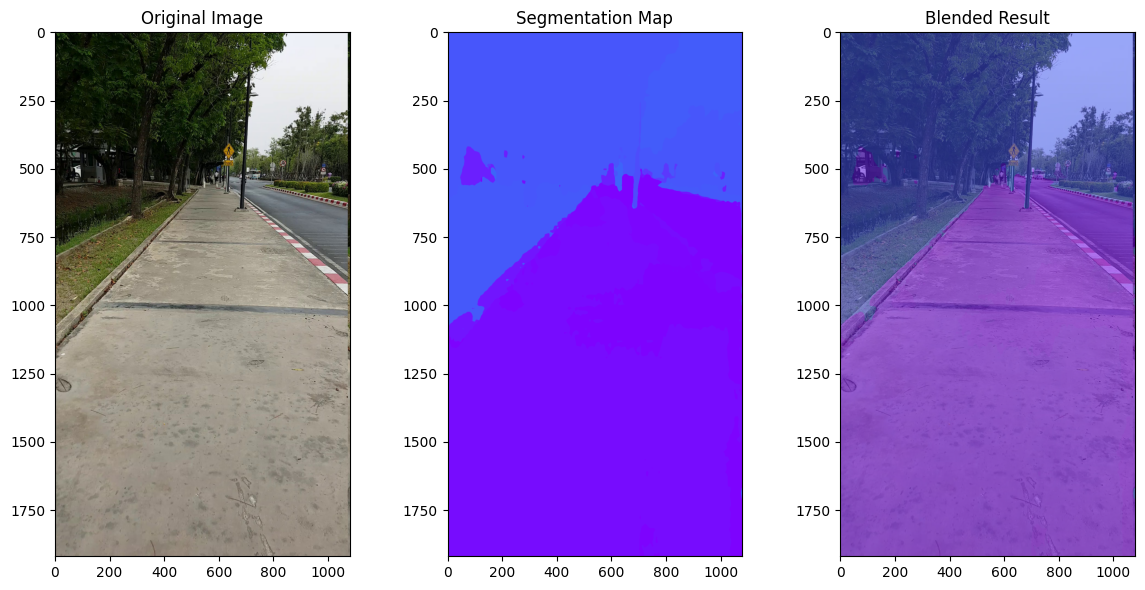

Average sidewalk confidence: 0.0424


In [ ]:
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load model and processor
model_name = "LizhengMathAi/segformer-finetuned-sidewalk-10k-steps"
model_name = "nickmuchi/segformer-b4-finetuned-segments-sidewalk"
model_name = "tobiasc/segformer-b0-finetuned-segments-sidewalk"

processor = SegformerImageProcessor.from_pretrained(model_name)
model = SegformerForSemanticSegmentation.from_pretrained(model_name)

# Function to visualize predictions
def visualize_segmentation(image, segmentation_map, alpha=0.5):
    # Create a colormap
    colors = plt.cm.rainbow(np.linspace(0, 1, 256))
    # Apply the colormap to the segmentation map
    colored_segmentation = colors[segmentation_map]

    # Ensure image is RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Convert PIL image to numpy array
    image_array = np.array(image)

    # Create blended image
    blended = alpha * colored_segmentation[:, :, :3] + (1 - alpha) * image_array / 255.0

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(colored_segmentation[:, :, :3])
    plt.title("Segmentation Map")

    plt.subplot(1, 3, 3)
    plt.imshow(blended)
    plt.title("Blended Result")

    plt.tight_layout()
    plt.show()

# Test on a local image
def test_local_image(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")

    outputs = model(**inputs)
    logits = outputs.logits

    # Resize logits to match original image size
    upsampled_logits = torch.nn.functional.interpolate(
        logits,
        size=image.size[::-1],  # (height, width)
        mode="bilinear",
        align_corners=False
    )

    predictions = upsampled_logits.argmax(dim=1)[0].numpy()
    visualize_segmentation(image, predictions)

    # Print sidewalk confidence
    sidewalk_class_id = 2  # Adjust this to match the sidewalk class ID in your model
    sidewalk_confidence = torch.softmax(upsampled_logits, dim=1)[0, sidewalk_class_id].mean().item()
    print(f"Average sidewalk confidence: {sidewalk_confidence:.4f}")

# Test on an online image
def test_online_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    test_local_image(image)

# Example usage
test_local_image("Raw_107.jpg")
test_online_image("https://example.com/street_image.jpg")

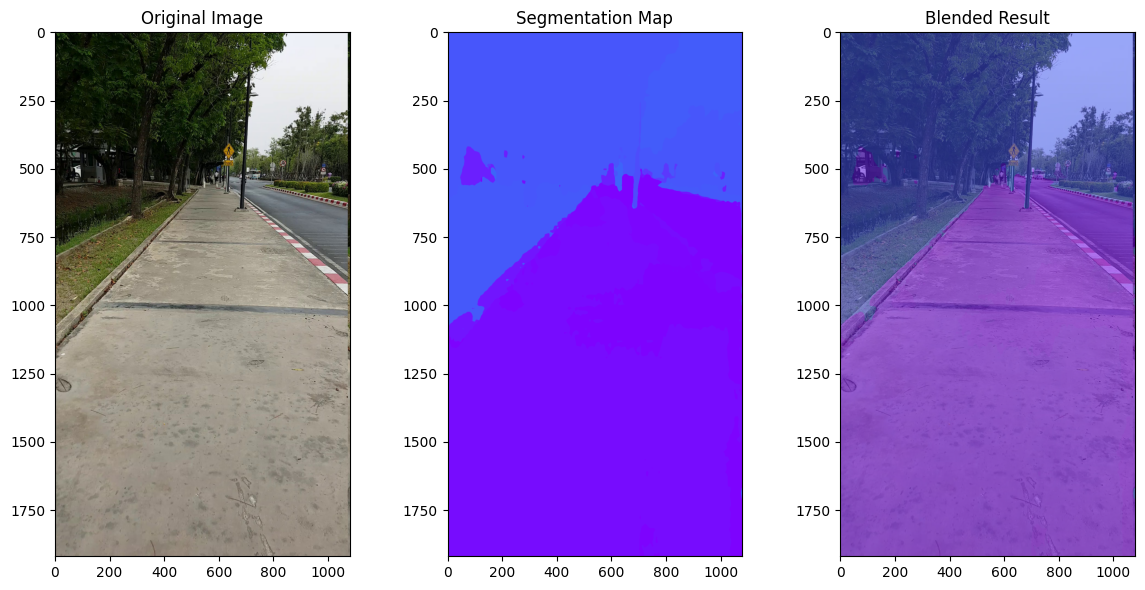

Average sidewalk confidence: 0.0424


In [ ]:
test_local_image("Raw_107.jpg")

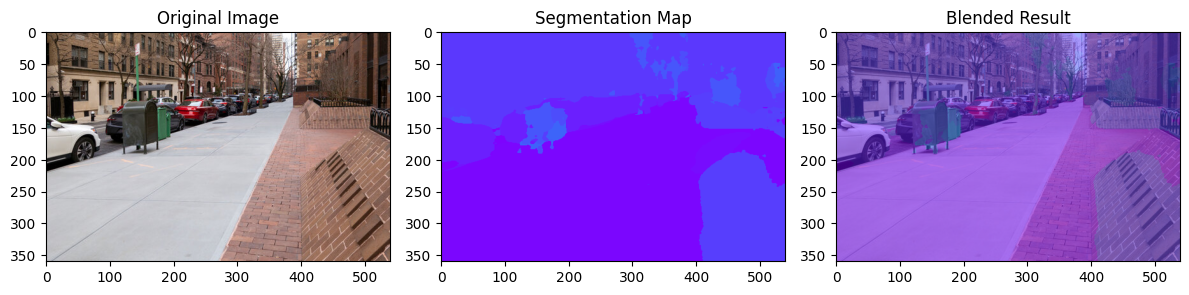

Average sidewalk confidence: 0.4306


In [ ]:
test_local_image("sw1.jpg")